# Dataframes

In [2]:
import pandas as pd

C:\Users\Pepo\AppData\Local\Temp\ipykernel_4504\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Input df

In [35]:
data = {
    "Customer": ["John", "Jane", "Bob", "Alice"],
    "Product": ["Laptop", "Keyboard", "Mouse", "Printer"],
    "Sales Amount": [1100, 100, 40, 700]
}

df = pd.DataFrame(data)

df

,Customer,Product,Sales Amount
0,John,Laptop,1100
1,Jane,Keyboard,100
2,Bob,Mouse,40
3,Alice,Printer,700


## Column selection

In [36]:
# passing list of names select columns
names = df[["Customer","Product"]]

# 1 column returns Serie, multiple return DataFrame
print(type(names))
names

<class 'pandas.core.frame.DataFrame'>


,Customer,Product
0,John,Laptop
1,Jane,Keyboard
2,Bob,Mouse
3,Alice,Printer


## Row selection

In [37]:
# passing slice object select rows
rows = df[1:3]

print(type(rows))
rows

<class 'pandas.core.frame.DataFrame'>


,Customer,Product,Sales Amount
1,Jane,Keyboard,100
2,Bob,Mouse,40


## Iterating columns

In [38]:
for column_name in df.columns:
    print(f"Selected {column_name}\n{df[column_name]}")


Selected Customer
0     John
1     Jane
2      Bob
3    Alice
Name: Customer, dtype: object
Selected Product
0      Laptop
1    Keyboard
2       Mouse
3     Printer
Name: Product, dtype: object
Selected Sales Amount
0    1100
1     100
2      40
3     700
Name: Sales Amount, dtype: int64


## Iterating rows

In [39]:
for index, row_items in df.iterrows():
    print(f"Index : {index}")
    for row_item in row_items:
        print(f"Row item: {row_item}")


Index : 0
Row item: John
Row item: Laptop
Row item: 1100
Index : 1
Row item: Jane
Row item: Keyboard
Row item: 100
Index : 2
Row item: Bob
Row item: Mouse
Row item: 40
Index : 3
Row item: Alice
Row item: Printer
Row item: 700


## Group by

In [3]:
data = {
    "Customer": ["John", "Jane", "Bob", "Alice", "John", "Jane", "Bob", "Alice"],
    "Product": ["Laptop", "Keyboard", "Mouse", "Printer", "Laptop", "Keyboard", "Mouse", "Printer"],
    "Sales Amount": [1100, 100, 40, 700, 1100, 100, 40, 700]
}

df = pd.DataFrame(data)

df

,Customer,Product,Sales Amount
0,John,Laptop,1100
1,Jane,Keyboard,100
2,Bob,Mouse,40
3,Alice,Printer,700
4,John,Laptop,1100
5,Jane,Keyboard,100
6,Bob,Mouse,40
7,Alice,Printer,700


In [4]:
grouped_data = df.groupby(["Customer","Product"])

print(type(grouped_data))

print(type(grouped_data["Sales Amount"].sum()))

grouped_data["Sales Amount"].sum().reset_index()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.series.Series'>


,Customer,Product,Sales Amount
0,Alice,Printer,1400
1,Bob,Mouse,80
2,Jane,Keyboard,200
3,John,Laptop,2200


## Window function

In [22]:
data = {
    "Date": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05"],
    "Close Price": [100, 100, 100, 100, 100],
}

df = pd.DataFrame(data)

df["Date"] = pd.to_datetime(df["Date"])

df.set_index("Date", inplace=True)

print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-01-01 to 2024-01-05
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Close Price  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes
None


,Close Price
Date,
2024-01-01,100
2024-01-02,100
2024-01-03,100
2024-01-04,100
2024-01-05,100


In [18]:
# 3 days movig average
print(type(df["Close Price"].rolling(window=3)))

print(type(df["Close Price"].rolling(window=3).mean()))

df["3days_rolling_mean"] = df["Close Price"].rolling(window=3).mean()

df

<class 'pandas.core.window.rolling.Rolling'>
<class 'pandas.core.series.Series'>


,Close Price,3days_rolling_mean
Date,,
2024-01-01,100,NaN
2024-01-02,200,NaN
2024-01-03,350,216.666667
2024-01-04,450,333.333333
2024-01-05,100,300.000000


In [25]:
# 5 days rolling sum
df["5days_rolling_sum"] = df["Close Price"].rolling(window=5, min_periods=1, step=2).sum()

df

,Close Price,5days_rolling_sum
Date,,
2024-01-01,100,100.0
2024-01-02,100,NaN
2024-01-03,100,300.0
2024-01-04,100,NaN
2024-01-05,100,500.0


## Descriptive statistics

In [26]:
data = {
    "Student_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Exam_score": [85, 78, 93, 88, 76, 95, 89, 93, 80, 84]
}

df = pd.DataFrame(data)

df

,Student_id,Exam_score
0,1,85
1,2,78
2,3,93
3,4,88
4,5,76
5,6,95
6,7,89
7,8,93
8,9,80
9,10,84


In [30]:
mean_score = df["Exam_score"].mean()
median_score = df["Exam_score"].median()
std_deviation_score = df["Exam_score"].std()
percentile_25 = df["Exam_score"].quantile(.25)
percentile_75 = df["Exam_score"].quantile(.75)

In [31]:
print(mean_score)
print(median_score)
print(std_deviation_score)
print(percentile_25)
print(percentile_75)

86.1
86.5
6.640783086353597
81.0
92.0


## Reindexing

row labels = row index or dataframe index
column labels = column index

row reindexing either using reindex() method or by passing index to DataFrame
column reindexing either using reindex() method or by directly assigning new labels

In [98]:
data = {
    "A": [1, 2, 3, ],
    "B": [4, 5, 6, ],
    "C": [7, 8, 9, ],
}

df = pd.DataFrame(data)

df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [99]:
# row indexing in initializer

df = pd.DataFrame(data, index=["X", "Y", "Z"])

df

,A,B,C
X,1,4,7
Y,2,5,8
Z,3,6,9


In [100]:
# row reindexing existing DataFrame

df = df.reindex(["A", "B", "X"])

df

,A,B,C
A,NaN,NaN,NaN
B,NaN,NaN,NaN
X,1.0,4.0,7.0


In [101]:
# column indexing existing DataFrame

df = df.reindex(columns=["A", "B", "X"])

df

,A,B,X
A,NaN,NaN,NaN
B,NaN,NaN,NaN
X,1.0,4.0,NaN


In [102]:
# rename rows

df.rename({"A": "AA", "B": "BB"}, axis=0, inplace=True)

df

,A,B,X
AA,NaN,NaN,NaN
BB,NaN,NaN,NaN
X,1.0,4.0,NaN


In [103]:
# rename column / row

df.rename({"A": "AA", "B": "BB"}, axis=1, inplace=True)

df

,AA,BB,X
AA,NaN,NaN,NaN
BB,NaN,NaN,NaN
X,1.0,4.0,NaN


## Handling missing values

In [2]:
import numpy as np

In [4]:
data = {
    "Student_ID": [101, 102, 103, 104, 105],
    "Score": [85, np.NaN, 78, 88, np.NaN]
}

df = pd.DataFrame(data)

print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  5 non-null      int64  
 1   Score       3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes
None


,Student_ID,Score
0,101,85.0
1,102,NaN
2,103,78.0
3,104,88.0
4,105,NaN


In [5]:
# drop rows with missing values
df_dropped_rows = df.dropna()

df_dropped_rows

,Student_ID,Score
0,101,85.0
2,103,78.0
3,104,88.0


In [8]:
# drop columns with missing values
df_dropped_cols = df.dropna(axis=1)

df_dropped_cols

df_dropped_cols

,Student_ID
0,101
1,102
2,103
3,104
4,105


In [9]:
# fill missing values with constant

df_filled = df.fillna(0)

df_filled

,Student_ID,Score
0,101,85.0
1,102,0.0
2,103,78.0
3,104,88.0
4,105,0.0


In [10]:
# fill missing values using interpolation

df_interpolated = df.interpolate()

df_interpolated

,Student_ID,Score
0,101,85.0
1,102,81.5
2,103,78.0
3,104,88.0
4,105,88.0


In [11]:
# fill issing values using mean

mean_score = df["Score"].mean()

df_filled_mean = df.fillna({"Score": mean_score})

df_filled_mean

,Student_ID,Score
0,101,85.000000
1,102,83.666667
2,103,78.000000
3,104,88.000000
4,105,83.666667


In [13]:
# fill issing values using median

median_score = df["Score"].median()

df_filled_median = df.fillna({"Score": median_score})

df_filled_median

,Student_ID,Score
0,101,85.0
1,102,85.0
2,103,78.0
3,104,88.0
4,105,85.0


## Reshaping and sorting

In [103]:
# Reshaping
# long format = more rows, wide format = more columns
# melt() function -> from wide to long format = unpivoting
# pivot() function -> from long format to wide format

# Sorting
# sort by single or multiple column -> sort_values() method
# sort by index -> sort_index() method

data = {
    "Date": ['2023-01-01', '2023-01-02', '2023-01-03'],
    "Product_A_Sales": [100, 200, 300],
    "Product_B_Sales": [400, 500, 600],
    "Product_C_Sales": [700, 800, 900],
}

df = pd.DataFrame(data)

print(df.index)
print(df.columns)

df

RangeIndex(start=0, stop=3, step=1)
Index(['Date', 'Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales'], dtype='object')


,Date,Product_A_Sales,Product_B_Sales,Product_C_Sales
0,2023-01-01,100,400,700
1,2023-01-02,200,500,800
2,2023-01-03,300,600,900


In [51]:
# melt()

df_long = pd.melt(df, id_vars="Date", var_name="Product", value_name="Sales")

df_long

,Date,Product,Sales
0,2023-01-01,Product_A_Sales,100
1,2023-01-02,Product_A_Sales,200
2,2023-01-03,Product_A_Sales,300
3,2023-01-01,Product_B_Sales,400
4,2023-01-02,Product_B_Sales,500
5,2023-01-03,Product_B_Sales,600
6,2023-01-01,Product_C_Sales,700
7,2023-01-02,Product_C_Sales,800
8,2023-01-03,Product_C_Sales,900


In [102]:
# pivot
df_wide = df_long.pivot(index="Date", columns="Product", values="Sales")

df_wide.reset_index(inplace=True)

# df_wide.rename_axis(None, inplace=True)
df_wide.rename_axis(None, axis="columns", inplace=True)

# print(df_wide.info())

# df_wide.set_index("Product_A_Sales", append=True, inplace=True)

# df_wide.index.name = "XXX"
# df_wide.columns.name = "YYY"

print(df_wide.index)
print(df_wide.columns)


df_wide

RangeIndex(start=0, stop=3, step=1)
Index(['Date', 'Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales'], dtype='object')


,Date,Product_A_Sales,Product_B_Sales,Product_C_Sales
0,2023-01-01,100,400,700
1,2023-01-02,200,500,800
2,2023-01-03,300,600,900


In [108]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [48, 37, 48, 32],
    "Salary": [60000, 70000, 80000, 90000]
}

df = pd.DataFrame(data)

df

,Name,Age,Salary
0,Alice,48,60000
1,Bob,37,70000
2,Charlie,48,80000
3,David,32,90000


In [109]:
df_sorted = df.sort_values(by="Age", ascending=True)

df_sorted

,Name,Age,Salary
3,David,32,90000
1,Bob,37,70000
0,Alice,48,60000
2,Charlie,48,80000


In [111]:
df_sorted = df.sort_values(by=["Age", "Salary"], ascending=False)

df_sorted

,Name,Age,Salary
2,Charlie,48,80000
0,Alice,48,60000
1,Bob,37,70000
3,David,32,90000


In [112]:
df_sorted = df.sort_index(ascending=False)

df_sorted

,Name,Age,Salary
3,David,32,90000
2,Charlie,48,80000
1,Bob,37,70000
0,Alice,48,60000


## Transposing

In [122]:
data = {
    "Month": ["Jan", "Feb", "Mar"],
    "Product_A": [100, 200, 300],
    "Product_B": [100, 200, 300],
    "Product_C": [100, 200, 300],
}

df = pd.DataFrame(data)

df.set_index("Month", inplace=True)
df.rename_axis(None, inplace=True)

print(df.index)
print(df.columns)

df

Index(['Jan', 'Feb', 'Mar'], dtype='object')
Index(['Product_A', 'Product_B', 'Product_C'], dtype='object')


,Product_A,Product_B,Product_C
Jan,100,100,100
Feb,200,200,200
Mar,300,300,300


In [124]:
df_transposed = df.transpose()

print(df.index)
print(df.columns)

df_transposed

Index(['Jan', 'Feb', 'Mar'], dtype='object')
Index(['Product_A', 'Product_B', 'Product_C'], dtype='object')


,Jan,Feb,Mar
Product_A,100,200,300
Product_B,100,200,300
Product_C,100,200,300


## Joining

In [2]:
data1 = {
    "ID": [1, 2, 4],
    "Name": ["Alice", "Bob", "Charlie"]
}

data2 = {
    "ID": [1, 3, 4, 5],
    "Salary": [50000, 60000, 55000, 65000]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1)
print(df2)

   ID     Name
0   1    Alice
1   2      Bob
2   4  Charlie
   ID  Salary
0   1   50000
1   3   60000
2   4   55000
3   5   65000


In [3]:
# Inner join
inner_result = pd.merge(left=df1, right=df2, on="ID", how="inner")

inner_result

,ID,Name,Salary
0,1,Alice,50000
1,4,Charlie,55000


In [5]:
# left join
left_result = pd.merge(left=df1, right=df2, on="ID", how="left")

left_result

,ID,Name,Salary
0,1,Alice,50000.0
1,2,Bob,NaN
2,4,Charlie,55000.0


In [6]:
# outer join
outer_result = pd.merge(left=df1, right=df2, on="ID", how="outer")

outer_result

,ID,Name,Salary
0,1,Alice,50000.0
1,2,Bob,NaN
2,3,NaN,60000.0
3,4,Charlie,55000.0
4,5,NaN,65000.0


In [8]:
# cross join
cross_result = pd.merge(left=df1, right=df2, how="cross")

cross_result

,ID_x,Name,ID_y,Salary
0,1,Alice,1,50000
1,1,Alice,3,60000
2,1,Alice,4,55000
3,1,Alice,5,65000
4,2,Bob,1,50000
5,2,Bob,3,60000
6,2,Bob,4,55000
7,2,Bob,5,65000
8,4,Charlie,1,50000
9,4,Charlie,3,60000


## Handling time series

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# create datime index
date_rng = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")

date_rng

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [13]:
# create DataFrame using index
df = pd.DataFrame(index=date_rng)

df

""
2024-01-01
2024-01-02
2024-01-03
2024-01-04
2024-01-05
...
2024-12-27
2024-12-28
2024-12-29
2024-12-30


In [15]:
# add random values to DataFrame
df["Temperature"] = np.random.randint(low=-30, high=50, size=len(date_rng))

print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  366 non-null    int32
dtypes: int32(1)
memory usage: 4.3 KB
None


,Temperature
2024-01-01,10
2024-01-02,13
2024-01-03,-1
2024-01-04,27
2024-01-05,19
...,...
2024-12-27,44
2024-12-28,31
2024-12-29,-8
2024-12-30,41


In [ ]:
# Slicing

df_sliced = df["2023-06-01":"2023-06-31"]



In [17]:
# Resampling
df_resampled_weekly = df.resample(rule="W").mean()

print(type(df_resampled_weekly))

df_resampled_weekly

<class 'pandas.core.frame.DataFrame'>


,Temperature
2024-01-07,15.285714
2024-01-14,-1.000000
2024-01-21,7.142857
2024-01-28,-1.142857
2024-02-04,14.571429
2024-02-11,11.285714
2024-02-18,1.428571
2024-02-25,5.285714
2024-03-03,18.285714
2024-03-10,4.285714


In [19]:
# Statistical calculations
average_temp = df["Temperature"].mean()

median_temp = df["Temperature"].median()

print(average_temp)
print(median_temp)

9.612021857923498
11.0


In [30]:
# Rolling statistics
df["Temperature_rolling_avg"] = df["Temperature"].rolling(window=2).mean()

df

,Temperature,Temperature_rolling_avg
2024-01-01,10,NaN
2024-01-02,13,11.5
2024-01-03,-1,6.0
2024-01-04,27,13.0
2024-01-05,19,23.0
...,...,...
2024-12-27,44,35.0
2024-12-28,31,37.5
2024-12-29,-8,11.5
2024-12-30,41,16.5


In [31]:
# Shift data
df["Temperature_shifted"]=df["Temperature"].shift(1)

df

,Temperature,Temperature_rolling_avg,Temperature_shifted
2024-01-01,10,NaN,NaN
2024-01-02,13,11.5,10.0
2024-01-03,-1,6.0,13.0
2024-01-04,27,13.0,-1.0
2024-01-05,19,23.0,27.0
...,...,...,...
2024-12-27,44,35.0,26.0
2024-12-28,31,37.5,44.0
2024-12-29,-8,11.5,31.0
2024-12-30,41,16.5,-8.0


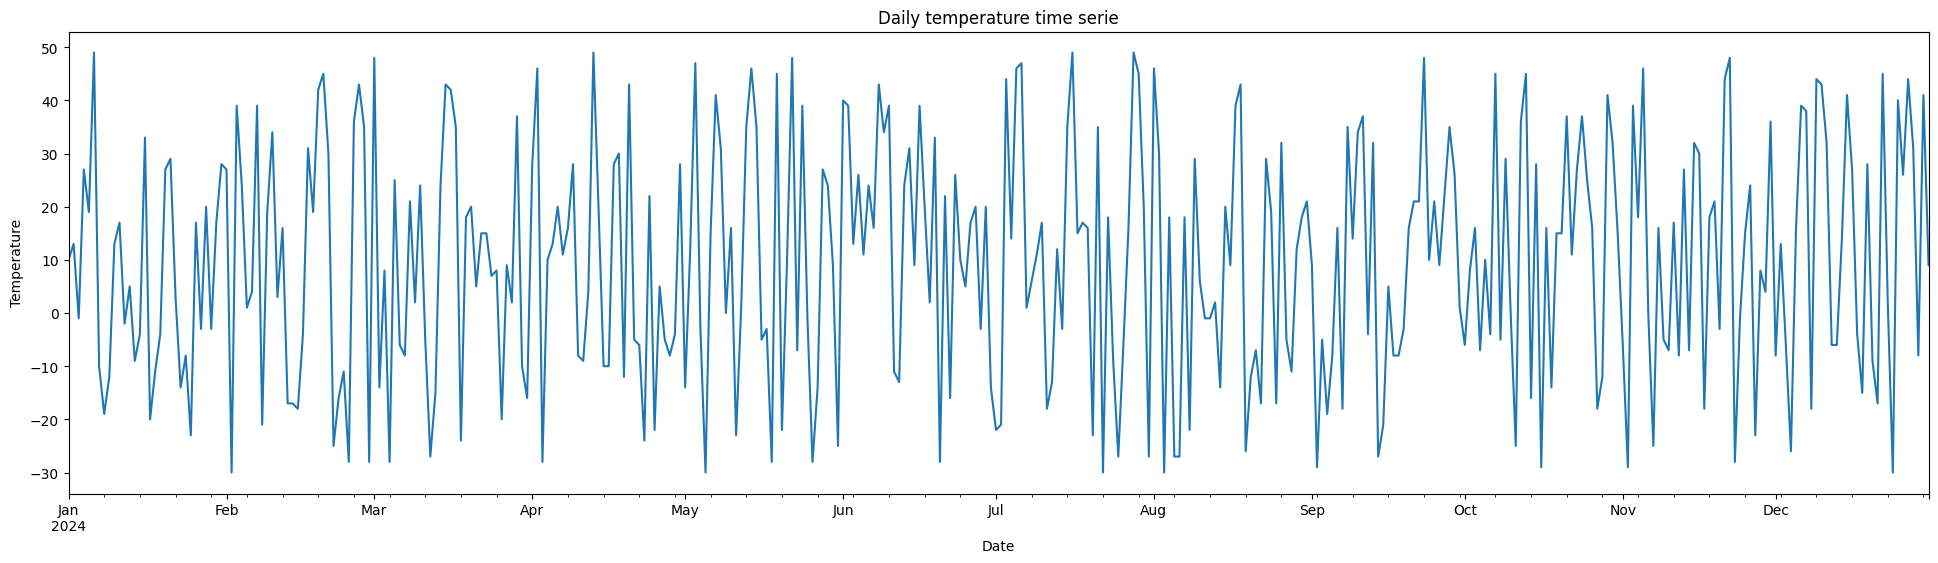

In [40]:
# Plot data
plt.figure(figsize=(24, 6))

df["Temperature"].plot()
plt.title("Daily temperature time serie")
plt.xlabel("Date")
plt.ylabel("Temperature")

plt.show()

## Serialization in dataframe

In [41]:
data = {
    "Customer": ["John", "Jane", "Bob", "Alice"],
    "Product": ["Laptop", "Keyboard", "Mouse", "Printer"],
    "Sales Amount": [1100, 100, 40, 700]
}

df = pd.DataFrame(data)

df

,Customer,Product,Sales Amount
0,John,Laptop,1100
1,Jane,Keyboard,100
2,Bob,Mouse,40
3,Alice,Printer,700


In [43]:
# CSV
df.to_csv("data.csv", index=False)

In [ ]:
# EXCEL
# df.to_excel("data.xlsx", sheet_name="data", index=False)

In [54]:
# JSON
df.to_json("data.json", orient="split")

In [56]:
# Pickle
df.to_pickle("data.pkl")

In [ ]:
# HDF5
# df.to_hdf("data.h5", key="df", mode="W")

In [ ]:
# PARQUET
df.to_parquet("data.parquet", index=False)